## TASK 1

In [1]:
import math
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, Y):
        X_train = X
        Y_train = Y
        
    def euclidean_distance(self, X1, X2):
        t1 = (X2[0] - X1[0]) ** 2
        t2 = (X2[1] - X1[1]) ** 2
        return math.sqrt(t1 + 2)
    
    def arg_sort(self, arr):
        n = len(arr)
        indices = list(range(n))
        for i in range(n):
            for j in range(0, n - i - 1):
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
                    indices[j], indices[j + 1] = indices[j + 1], indices[j]
        return indices

    
    
    def Count_ytest(self, distances):
        t, f = 0, 0
        for i in distances:
            if (Y_train[i] == 1):
                t += 1
            else:
                f += 1
        if (t > f):
            return 1
        else:
            return 0
            
        
    def predict(self, X):
        y_predict = []
        for x in X:
            distances = []
            for x_train in X_train:
                distances.append(self.euclidean_distance(x, x_train))
            a = self.arg_sort(distances)
            print(a)
            b = self.Count_ytest(a[:self.k])
            y_predict.append(b)
        return y_predict
        
            
            
knn = KNN(k = 3)
X_train = [[1, 2], [2, 4], [3, 6]]
Y_train = [0,0,1]
knn.fit(X_train, Y_train)

X_test = [[7,7], [3, 7]]
y_test = [0, 1]
y_pred = knn.predict(X_test)

print(y_pred)

[2, 1, 0]
[2, 1, 0]
[0, 0]


## TASK 2


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('fruit_data_with_colors _1_.csv')
txt_cat = df.select_dtypes(include=['object']).columns
df = df.drop(columns=txt_cat)
df.fillna(df.mean(), inplace=True)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['fruit_label'], test_size=10, random_state=42)

X_train = X_train[:50]
y_train = y_train[:50]



In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_val = range(1, 11)
scores = []


for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f'K={k}, Accuracy: {score:.3f}')

    

K=1, Accuracy: 0.500
K=2, Accuracy: 0.400
K=3, Accuracy: 0.400
K=4, Accuracy: 0.500
K=5, Accuracy: 0.500
K=6, Accuracy: 0.500
K=7, Accuracy: 0.500
K=8, Accuracy: 0.600
K=9, Accuracy: 0.400
K=10, Accuracy: 0.400


f:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
f:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

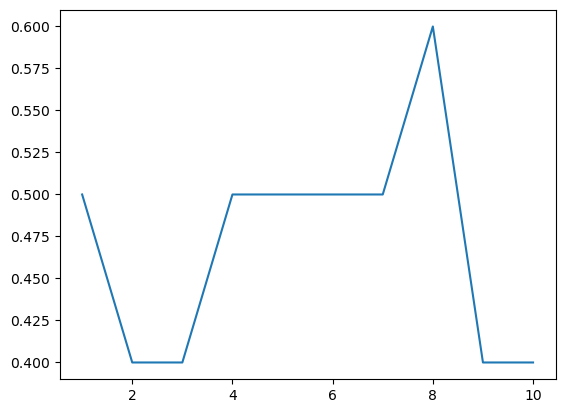

In [5]:
import matplotlib.pyplot as plt
plt.plot(k_val, scores)

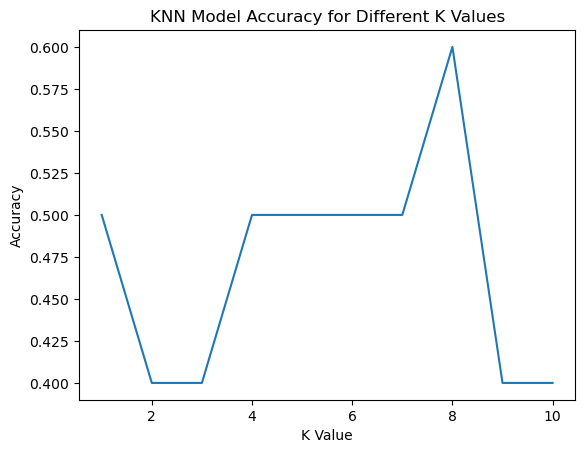

In [7]:
plt.show()
plt.plot(k_val, scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different K Values')
plt.show()